(506, 14)
Final R2 value is  0.15585020385540482


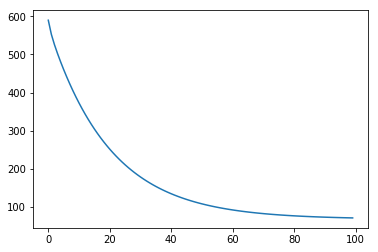

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# This function will take in all the feature data X
# as well as the current coefficient and bias values
# It should multiply all the feature value by their associated 
# coefficient and add the bias. It should then return the predicted 
# y values
def hypothesis(X, coefficients, bias):
    
    # TODO: Calculate and return predicted results
    
    predictedY = np.dot(coefficients, np.transpose(X)) + bias
    
    return predictedY



def calculateRSquared(bias, coefficients,X, Y):
    
    predictedY = hypothesis(X, coefficients, bias)
    
    avgY = np.average(Y)
    totalSumSq = np.sum((avgY - Y)**2)
    
    sumSqRes = np.sum((predictedY - Y)**2)
    
    r2 = 1.0-(sumSqRes/totalSumSq)
    
    return r2
    

def gradient_descent(bias, coefficients, alpha, X, Y, max_iter):


    length = len(X)
    
    # array is used to store change in cost function for each iteration of GD
    errorValues = []
    
    for num in range(0, max_iter):
        
        # TODO: 
        # Calculate predicted y values for current coefficient and bias values 
        # calculate and update bias using gradient descent rule
        # Update each coefficient value in turn using gradient descent rule
        
        predictedY = hypothesis(X, coefficients, bias)
        Cost_coefficients = np.sum((predictedY - Y)@ X)/ (length * 2)
        Cost_bias = np.sum((predictedY - Y))/ (length * 2)
        
        
        errorValues.append(np.sum((predictedY - Y)**2)/ (length + 2))
            
        coefficients -= alpha * Cost_coefficients
        bias -= alpha * Cost_bias
    

    
    # calculate R squared value for current coefficient and bias values
    rSquared = calculateRSquared(bias, coefficients,X, Y)
    print ("Final R2 value is ", rSquared)

    # plot the cost for each iteration of gradient descent
    plt.plot(errorValues)
    plt.show()
    
    return bias, coefficients


def multipleLinearRegression(X, Y):

    # set the number of coefficients equal to the number of features
    coefficients = np.zeros((1,X.shape[1]))
    bias = 0.0
    
    alpha = 0.05 # learning rate
    
    max_iter=100

    # call gredient decent, and get intercept(=bias) and coefficents
    bias, coefficients = gradient_descent(bias, coefficients, alpha, X, Y, max_iter)
    
    
    
    
def main():
    
    df = pd.read_csv("boston.csv")
    df = df.dropna()
    print (df.shape)
    
    data = df.values

     
    # Seperate teh features from the target feature    
    Y = data[:, -1]
    X = data[:, :-1]
    
    # Standardize each of the features in the dataset. 
    for num in range(len(X[0])):
        feature = data[:, num]
        feature = (feature - np.mean(feature))/np.std(feature)
        X[:, num] = feature
    
    # run regression function
    multipleLinearRegression(X, Y)
    

    

main()